### Profile : Ravi Kumar (ML 15 Sep Batch)

### Domain : Retail 

### Dataset : Customer Purchasing Behavior 

### Course of Action : Data Analysis and Plotting Visualizations

### Model Evaluation : Clustering Algorithm(K means) 

### Conclusions 


In [2]:
#Importing required packages.
import pandas as pd
import seaborn as sns
color = sns.color_palette()
import matplotlib.pyplot as plt

%matplotlib inline
import pandas_profiling 

In [3]:
#Loading dataset
supermarket = pd.read_csv("C:/Users/RAVI/Favorites/Downloads/UPX Material/Machine Learning/Project datasets/Cust Seg Rec/super.csv")

In [4]:
pandas_profiling.ProfileReport(supermarket)

Number of variables,6
Number of observations,702
Total Missing (%),0.0%
Total size in memory,32.9 KiB
Average record size in memory,48.1 B
Numeric,6
Categorical,0
Boolean,0
Date,0
Text (Unique),0
Rejected,0


> Observations from the sample data : 

>1. We have almost clean data except one column(total discount) has zeros which can be ignored for now 

>2. Total discount values are larger than purchase value that must be not correct (from above values 2563.28 41012.52 78737.48)

>3. Another column I am not touching is 'month since last transaction'

In [5]:
supermarket.describe()

,Cust_id,AVG_Actual_price_12,Purchase_Value,No_of_Items,Total_Discount,MONTH_SINCE_LAST_TRANSACTION
count,702.000000,702.000000,702.000000,702.000000,702.000000,702.000000
mean,501.414530,2642.877917,19820.633305,10.720798,20806.339088,5.029915
std,295.756706,1879.138285,34639.752609,20.038311,58427.798572,3.562840
min,1.000000,22.500000,45.000000,1.000000,-3962.480000,1.000000
25%,245.750000,1238.750000,4200.000000,2.000000,0.000000,2.000000
50%,486.500000,2100.000000,8660.000000,4.000000,2599.250000,4.000000
75%,763.750000,3700.000000,21197.000000,10.000000,17433.750000,8.000000
max,1006.000000,10000.000000,302721.740000,172.000000,734349.820000,12.000000


> Lets see Dendrogram for all columns 

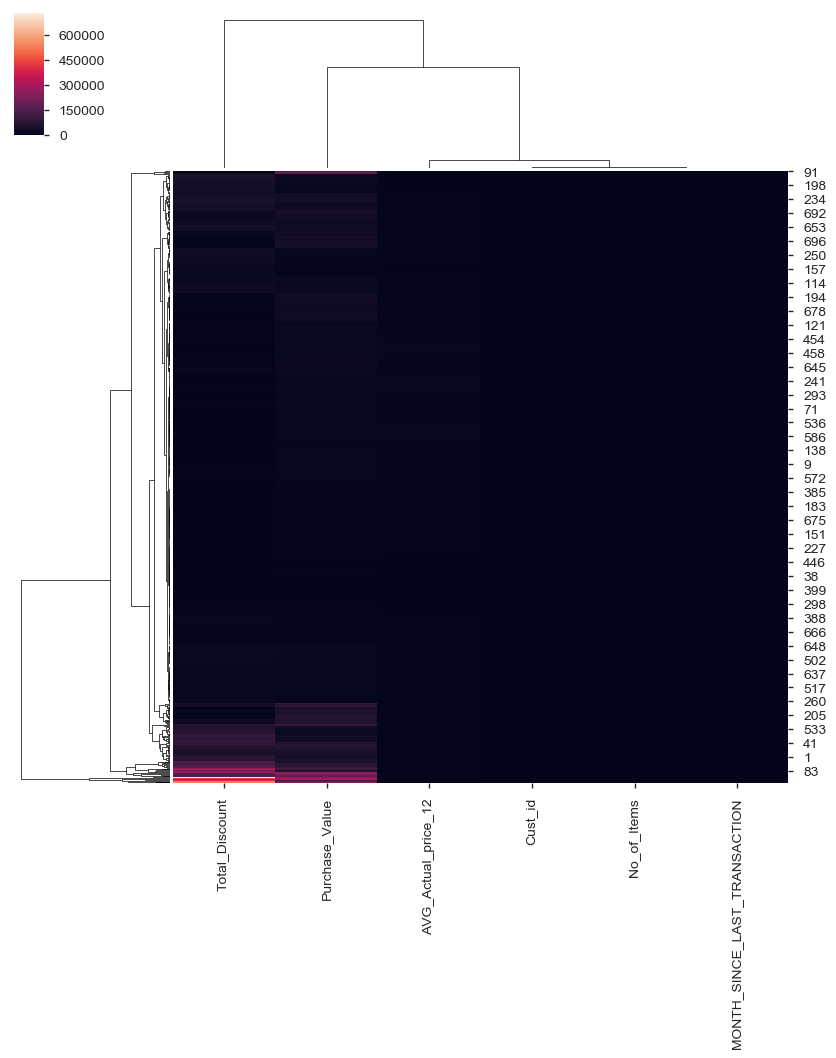

In [6]:
cols = ['Cust_id','AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items', 'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION']
sns.clustermap(supermarket[cols])

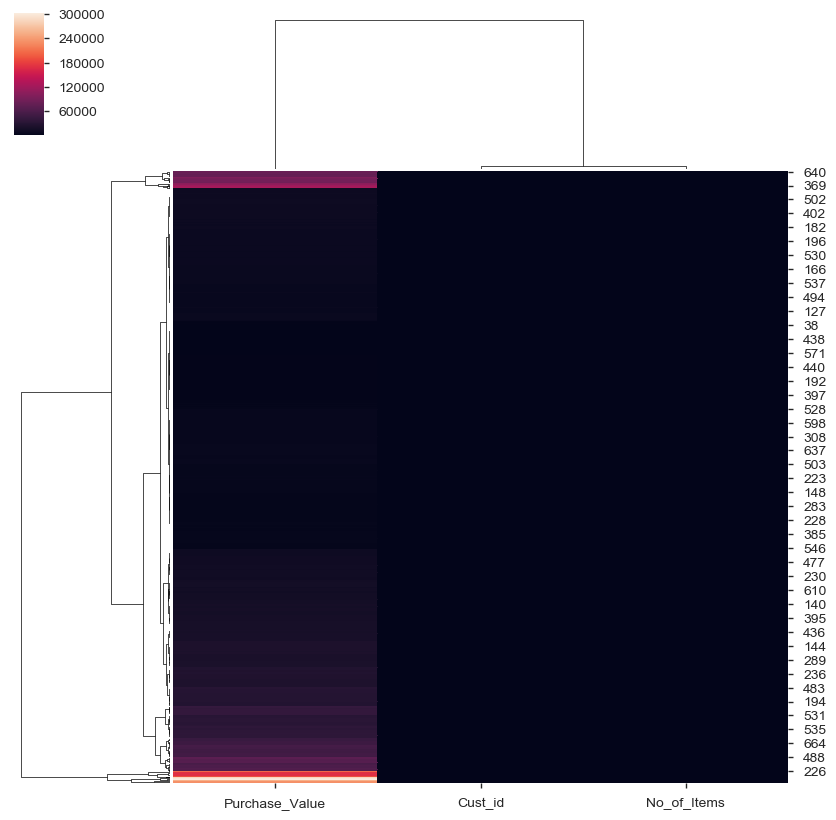

In [7]:
cols = [ 'Cust_id','Purchase_Value','No_of_Items']
sns.clustermap(supermarket[cols])

>> Just having a quick look into Month since last transaction and all other columns

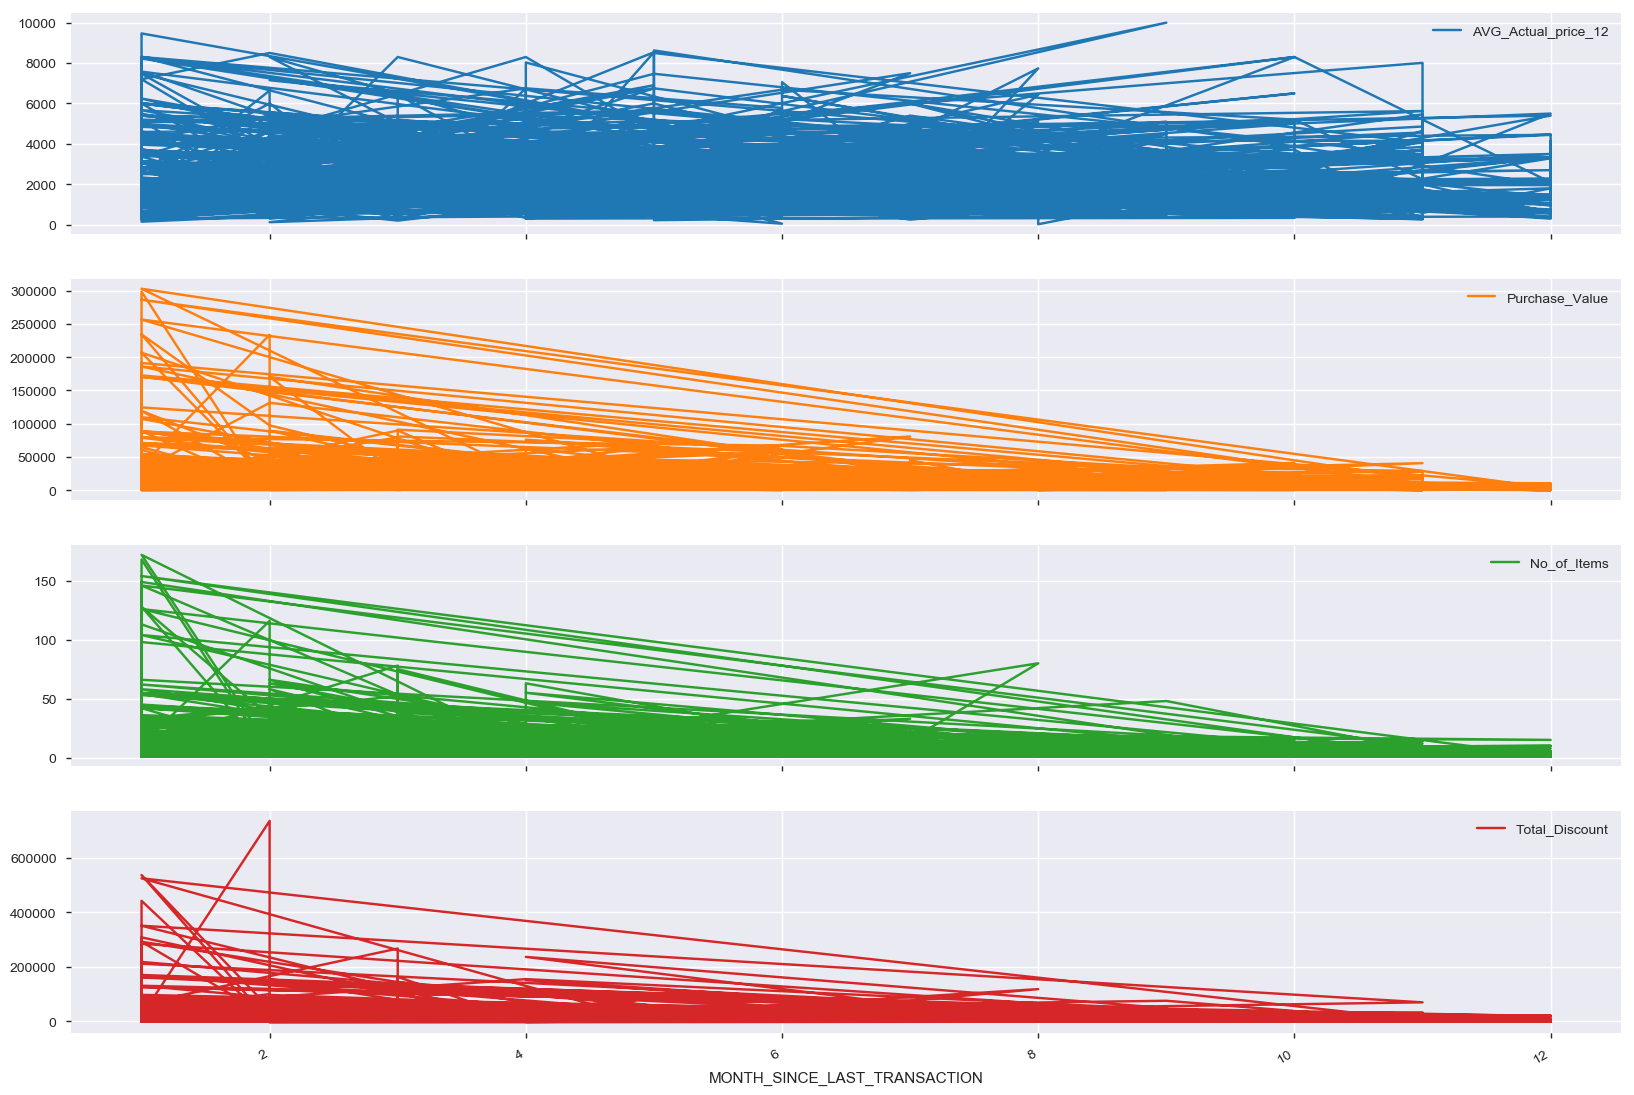

In [8]:
supermarket[['AVG_Actual_price_12', 'Purchase_Value', 'No_of_Items', 'Total_Discount', 'MONTH_SINCE_LAST_TRANSACTION']].plot(x='MONTH_SINCE_LAST_TRANSACTION', subplots=True, figsize=(20,15))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0600D0B0>,
      dtype=object)

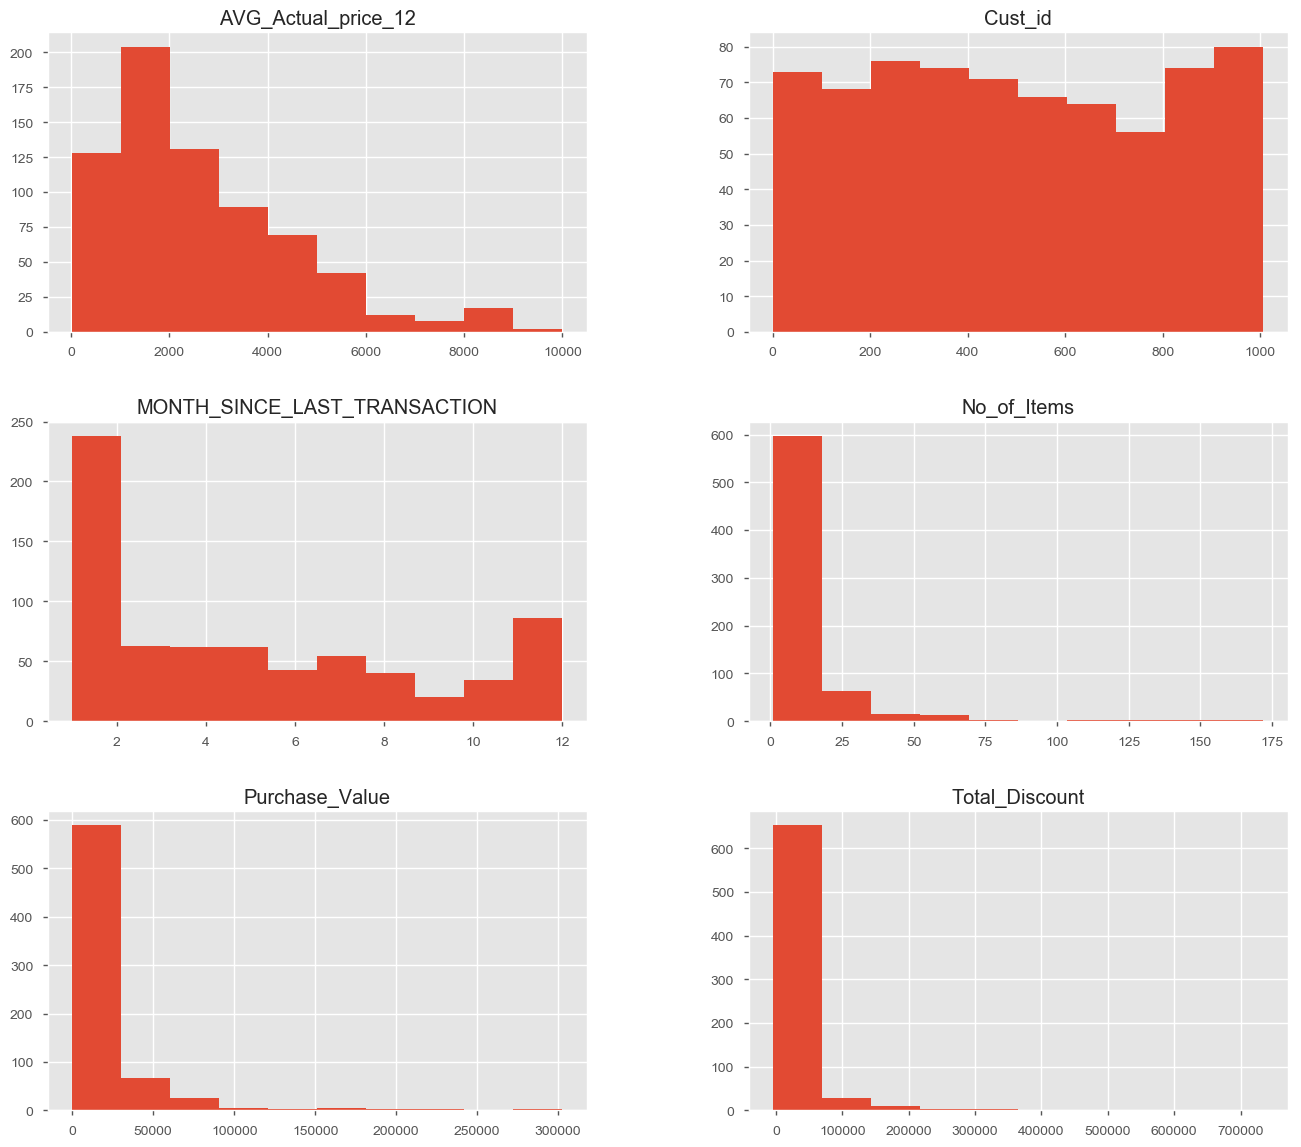

In [9]:
# Plotting some subplots with respect to cust_id on all columns 
plt.style.use('ggplot')
X = supermarket.drop('Cust_id', 1).values # drop target variable
y1 = supermarket['Cust_id'].values
pd.DataFrame.hist(supermarket, figsize = [16,14])

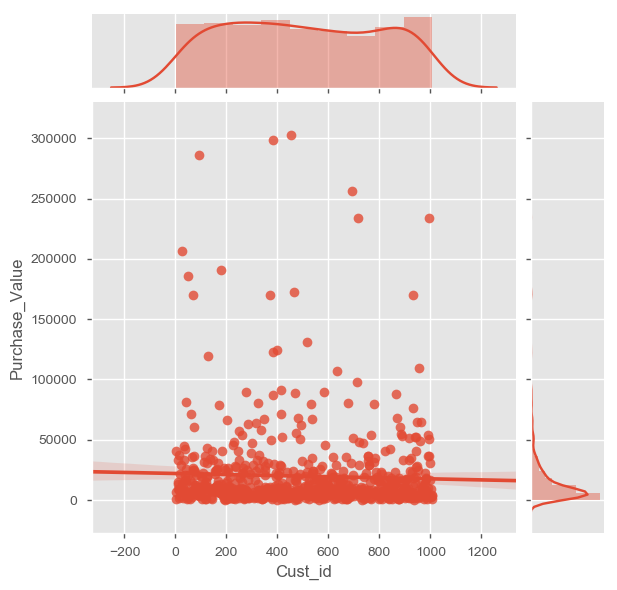

In [10]:
g = sns.jointplot("Cust_id", "Purchase_Value", data = supermarket, kind="reg")

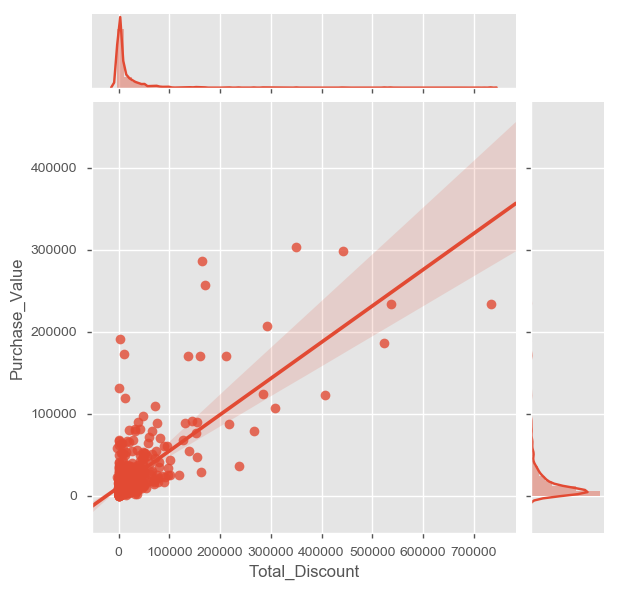

In [11]:
g = sns.jointplot("Total_Discount", "Purchase_Value", data = supermarket, kind="reg")

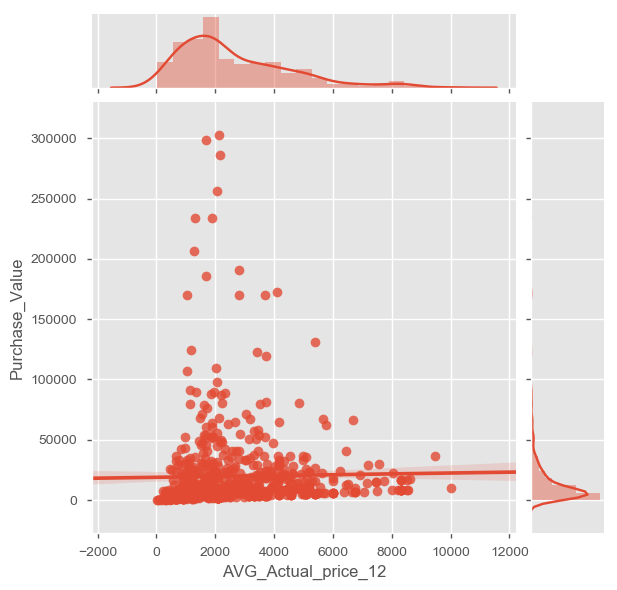

In [12]:
g = sns.jointplot("AVG_Actual_price_12", "Purchase_Value", data = supermarket, kind="reg")

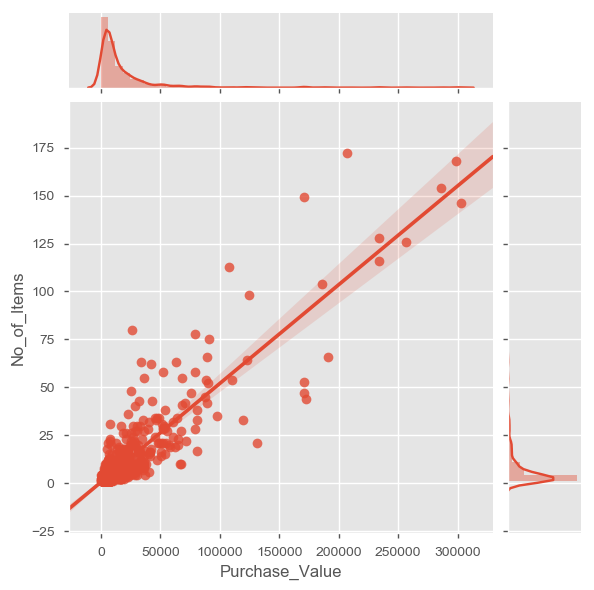

In [13]:
g = sns.jointplot("Purchase_Value", "No_of_Items", data = supermarket, kind="reg")

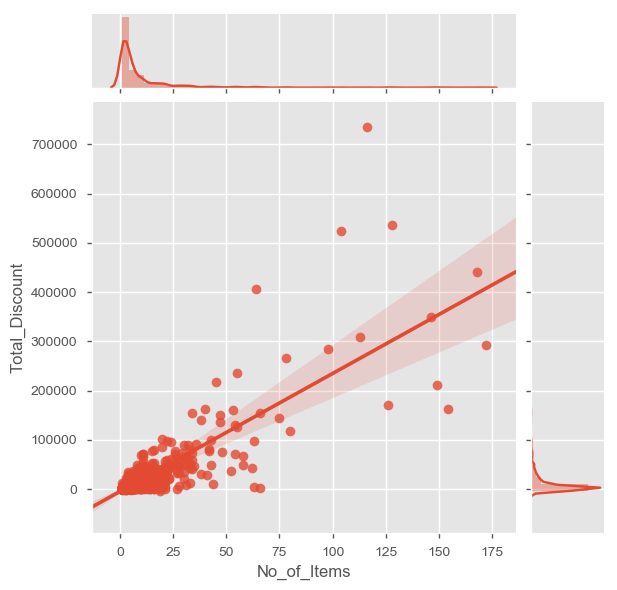

In [14]:
g = sns.jointplot("No_of_Items", "Total_Discount", data = supermarket, kind="reg")

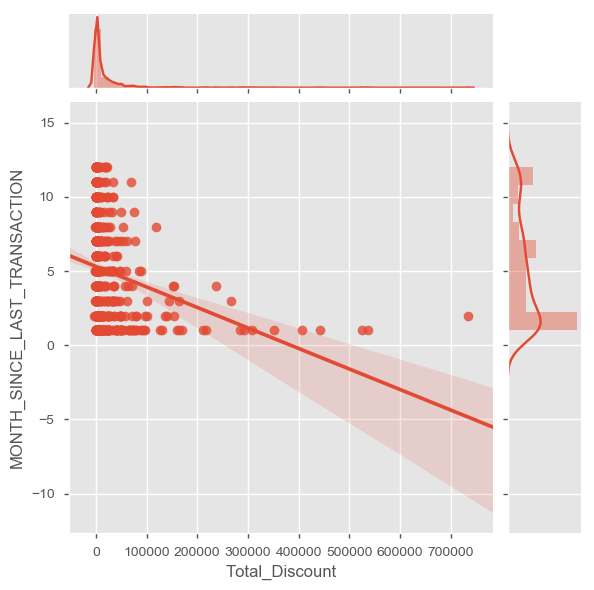

In [15]:
g = sns.jointplot("Total_Discount", "MONTH_SINCE_LAST_TRANSACTION", data = supermarket, kind="reg")

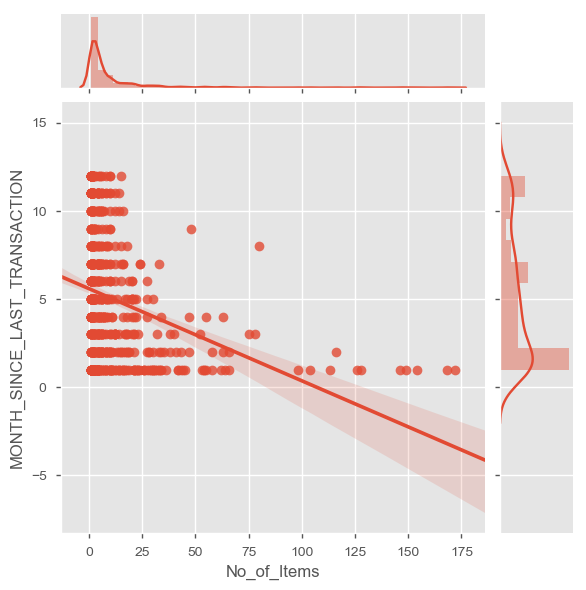

In [16]:
g = sns.jointplot("No_of_Items", "MONTH_SINCE_LAST_TRANSACTION", data = supermarket, kind="reg")

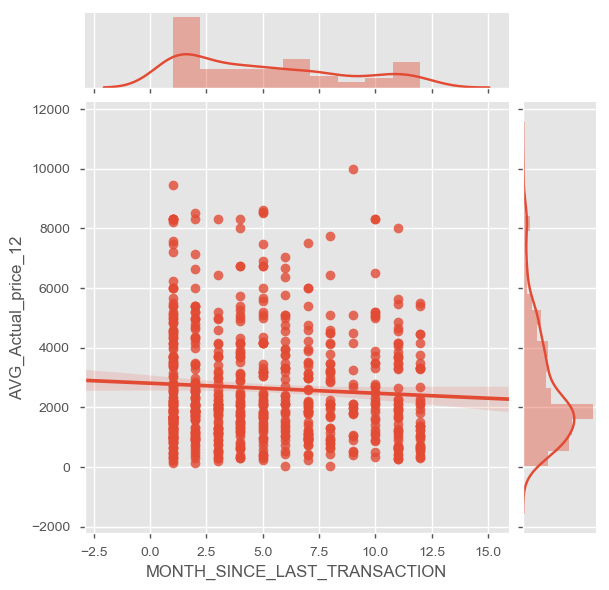

In [17]:
g = sns.jointplot("MONTH_SINCE_LAST_TRANSACTION", "AVG_Actual_price_12", data = supermarket, kind="reg")

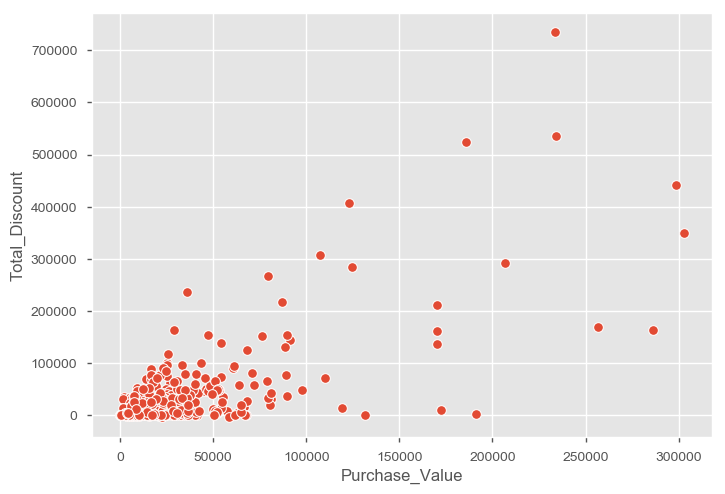

In [18]:
sns.scatterplot(x = 'Purchase_Value', y='Total_Discount', data = supermarket)

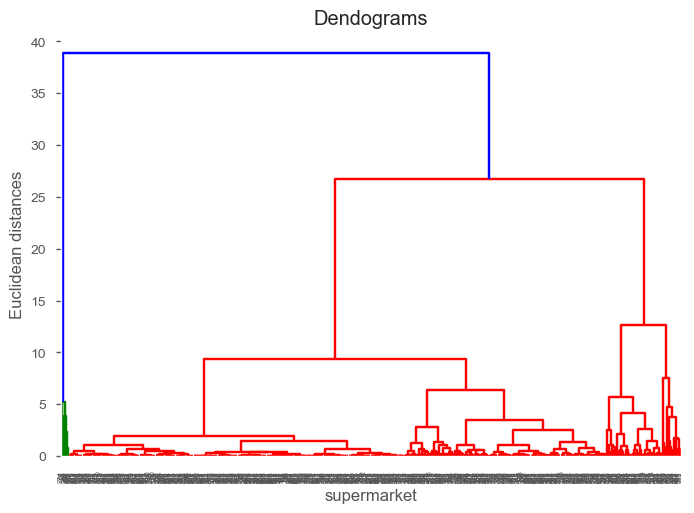

In [33]:
#Use dendrogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram_1 = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendograms')
plt.xlabel('supermarket')
plt.ylabel('Euclidean distances')
plt.show()
# ward method tries to minimize variance between clusters

> I am dividing all customers into small groups based on these 3 attributes (Id, no of items purchased and purchase value)

In [20]:
df_customerid_groups=supermarket.groupby("Cust_id")
print (len((df_customerid_groups.groups))) 

702


In [21]:
'''Creating a new dataframe with 'No_of_Items','Purchase_Value','Cust_id' columns, we are adding purchase value and no of items 
in a group of user, so will end up one row per one user'''

df_cluster=pd.DataFrame(columns=['Purchase_Value', 'No_of_Items','Cust_id'])
count=0
for k,v in (df_customerid_groups):
    df_cluster.loc[count] = [(v['No_of_Items'].sum()), v['Purchase_Value'].sum(), k]
    count+=1
df_cluster.shape  

(702, 3)

In [27]:
# Applying K-Means Clustering Algorithm # We use only 'purchase value','number of items' columns to cluster 
X = df_cluster.iloc[:, [0, 1]].values

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X= sc_X.fit_transform(X)

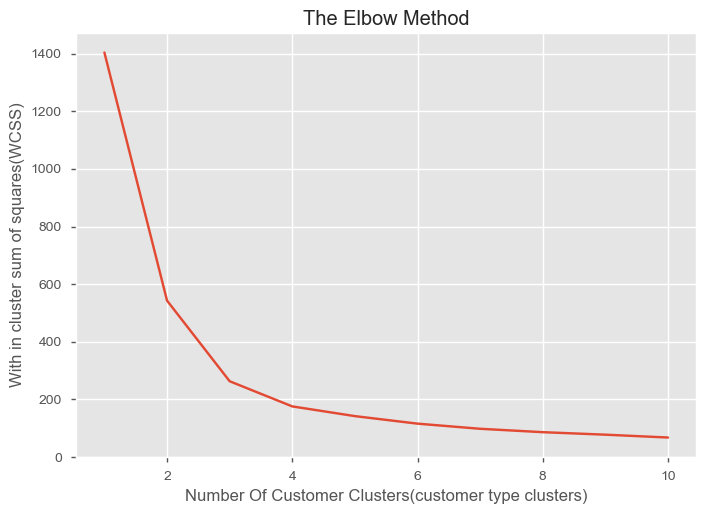

In [22]:
#Using the Elbow method to find the optical number of clusters
from sklearn.cluster import KMeans
wcss = [] #With in cluster sum of squares(Inertia)

# n_clusters is no.of clusters given by this method,
# k-means++ is an random initialization methods for centriods to avoid random intialization trap,
# max_iter is max no of iterations defined when k-means is running
# n_init is no of times k-means will run with different initial centroids


#From 2-10 doing multiple random initializations can make a huge difference to find a better local optima
for i in range(1,11): 
    kmeans = KMeans(n_clusters = i, init ='k-means++',max_iter=300,n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11) , wcss)
plt.title('The Elbow Method')
plt.xlabel('Number Of Customer Clusters(customer type clusters)')
plt.ylabel('With in cluster sum of squares(WCSS)')
plt.show()

In [23]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

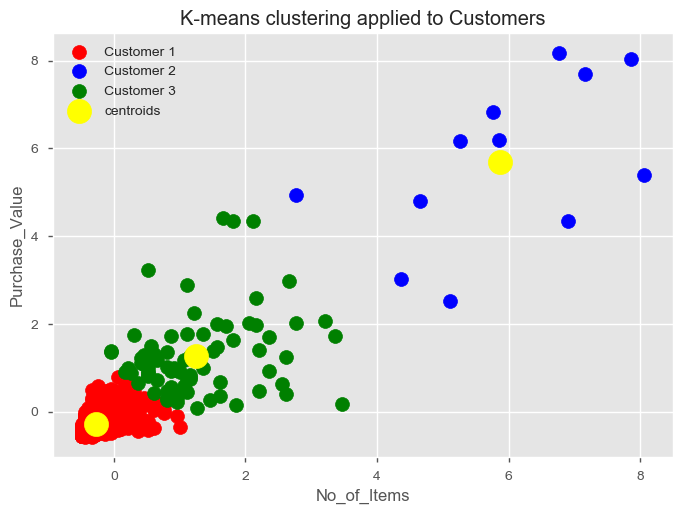

In [42]:
#visualizing the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Customer 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Customer 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Customer 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'centroids' )
# _centers_ --> also an attribute that can be accessed.
# s --> size of each point
plt.title("K-means clustering applied to Customers")
plt.xlabel('No_of_Items')
plt.ylabel('Purchase_Value')
plt.legend()
plt.show()

### >Conclusion:Customers 1 are regular customers as they are spending less price

### >Customers type 2 are gold range customers so we can send targeted advertisements

### >Customers type 3 are premium customers are medium spending 

### >>so based on the above customer purchase range we will give three types of Discount cards based on the minimum purchase value to push sales in the supermarket.

#### Unanswered Questions:
>>1. Time since last transaction of the customers 

>>2. Discount values has no logic and is so inconsistent with respect to purchase value(purchase value > discount -never true) 

>>3. 'Month since last transaction' i have not analyzed this columns data.

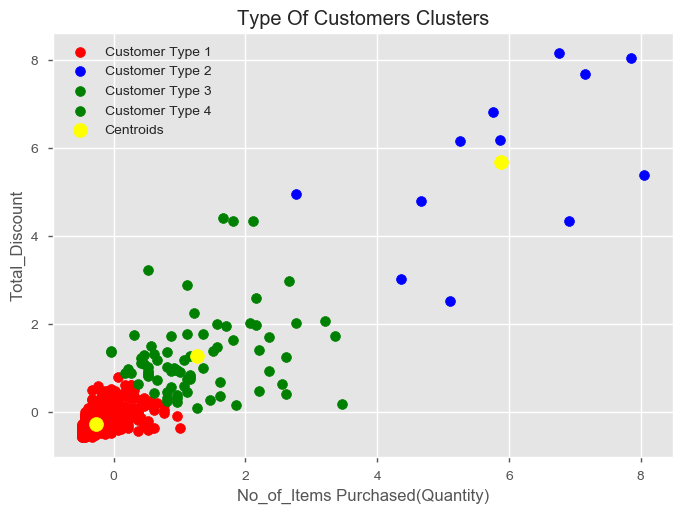

In [36]:
# Visualising the clusters between discount and items purchased fields
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Customer Type 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Customer Type 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'green', label = 'Customer Type 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'green', label = 'Customer Type 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'yellow', label = 'Centroids')
plt.title('Type Of Customers Clusters')
plt.xlabel('No_of_Items Purchased(Quantity)')
plt.ylabel('Total_Discount')
plt.legend()
plt.show()

# Thank You